# Dirty Café Sales — Exploratory Data Analysis

In this notebook, I explore the **Dirty Café Sales dataset** from Kaggle.  
The goals are to:
- Clean and standardize messy data
- Detect and handle outliers
- Create exploratory visualizations
- Analyze correlations between key variables

This is a practice project designed to build and demonstrate EDA skills.


In [2]:
# Saving requiremnts.txt file
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


## 1. Import Libraries & Load Data

Here we import necessary libraries and load the dataset into a Pandas DataFrame.


In [4]:
# Loading in the data and initial packages

import pandas as pd
import numpy as np

df = pd.read_csv('dirty_cafe_sales.csv')

## 2. Data Overview

We start by reviewing the dataset structure, identifying missing values, and checking for duplicates.


In [6]:
# Quick look at the data
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [8]:
df['Item'].value_counts()

Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
ERROR        292
Name: count, dtype: int64

In [9]:
df['Payment Method'].value_counts()

Payment Method
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: count, dtype: int64

In [10]:
df['Location'].value_counts()

Location
Takeaway    3022
In-store    3017
ERROR        358
UNKNOWN      338
Name: count, dtype: int64

In [11]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


## 3. Data Cleaning

Steps taken:
- Dropped rows with missing values (reduced dataset by ~50%).
- Converted 'UNKNOWN' and 'ERROR' entries into NaN.
- Standardized column names into snake_case.

This ensures consistency and prepares the dataset for analysis.


In [13]:
# Copy Creation
df_copy = df.copy()

In [14]:
# Dealing with missing values

df_copy = df_copy.dropna()

In [15]:
# lets see how many rows are left
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4550 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    4550 non-null   object
 1   Item              4550 non-null   object
 2   Quantity          4550 non-null   object
 3   Price Per Unit    4550 non-null   object
 4   Total Spent       4550 non-null   object
 5   Payment Method    4550 non-null   object
 6   Location          4550 non-null   object
 7   Transaction Date  4550 non-null   object
dtypes: object(8)
memory usage: 319.9+ KB


Wow! Over 50% of the rows were filled with null values.

In [17]:
# Resseting index
df_copy_reset = df_copy.reset_index(drop = True)

Lets deal with UNKNOWN and ERROR values.

In [19]:
# Replacing all UNKNOWN AND ERROR values with Other
df_copy_reset = df_copy_reset.replace('UNKNOWN', 'Other')

In [20]:
df_copy_reset = df_copy_reset.replace('ERROR', 'Other')

In [21]:
# Dropping all 'Other' values 
# Converting them to NA's for ease

df_copy_reset = df_copy_reset.replace('Other', np.nan)

In [22]:
df_copy_reset = df_copy_reset.dropna()

In [23]:
# Double checking data

df_copy_reset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3089 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    3089 non-null   object
 1   Item              3089 non-null   object
 2   Quantity          3089 non-null   object
 3   Price Per Unit    3089 non-null   object
 4   Total Spent       3089 non-null   object
 5   Payment Method    3089 non-null   object
 6   Location          3089 non-null   object
 7   Transaction Date  3089 non-null   object
dtypes: object(8)
memory usage: 217.2+ KB


In [24]:
df_copy_reset.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
7,TXN_2548360,Salad,5,5.0,25.0,Cash,Takeaway,2023-11-07
9,TXN_7619095,Sandwich,2,4.0,8.0,Cash,In-store,2023-05-03


Okay that is done!
Lets change columns and values to snake case and simplify them.

In [26]:
df_copy_reset.columns = df_copy_reset.columns.str.replace(' ', '_')

In [27]:
df_copy_reset.columns = df_copy_reset.columns.str.lower()

In [28]:
df_copy_reset.head()

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
7,TXN_2548360,Salad,5,5.0,25.0,Cash,Takeaway,2023-11-07
9,TXN_7619095,Sandwich,2,4.0,8.0,Cash,In-store,2023-05-03


Columns done, lets do the values.

In [30]:
df_copy_reset['item'] = df_copy_reset['item'].str.lower()

In [31]:
df_copy_reset['location'] = df_copy_reset['location'].str.lower()

In [32]:
df_copy_reset['location'] = df_copy_reset['location'].str.replace('-', '_')

In [33]:
df_copy_reset['payment_method'] = df_copy_reset['payment_method'].str.lower()

In [34]:
df_copy_reset['payment_method'] = df_copy_reset['payment_method'].str.replace(' ', '_')

In [35]:
# Check to make sure everything was done correctly
df_copy_reset.head()

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
0,TXN_1961373,coffee,2,2.0,4.0,credit_card,takeaway,2023-09-08
1,TXN_4977031,cake,4,3.0,12.0,cash,in_store,2023-05-16
4,TXN_3160411,coffee,2,2.0,4.0,digital_wallet,in_store,2023-06-11
7,TXN_2548360,salad,5,5.0,25.0,cash,takeaway,2023-11-07
9,TXN_7619095,sandwich,2,4.0,8.0,cash,in_store,2023-05-03


That looks good! Next lets make sure all the columns are the proper data types.

In [37]:
# Check to determine which data types need to be asjusted
df_copy_reset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3089 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    3089 non-null   object
 1   item              3089 non-null   object
 2   quantity          3089 non-null   object
 3   price_per_unit    3089 non-null   object
 4   total_spent       3089 non-null   object
 5   payment_method    3089 non-null   object
 6   location          3089 non-null   object
 7   transaction_date  3089 non-null   object
dtypes: object(8)
memory usage: 217.2+ KB


In [38]:
# Changing numerical data to float data type
df_copy_reset['quantity'] = df_copy_reset['quantity'].astype(float)

In [39]:
df_copy_reset['price_per_unit'] = df_copy_reset['price_per_unit'].astype(float)

In [40]:
df_copy_reset['total_spent'] = df_copy_reset['total_spent'].astype(float)

Now that that's done, lets take a look at the data

In [42]:
df_copy_reset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3089 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    3089 non-null   object 
 1   item              3089 non-null   object 
 2   quantity          3089 non-null   float64
 3   price_per_unit    3089 non-null   float64
 4   total_spent       3089 non-null   float64
 5   payment_method    3089 non-null   object 
 6   location          3089 non-null   object 
 7   transaction_date  3089 non-null   object 
dtypes: float64(3), object(5)
memory usage: 217.2+ KB


In [43]:
df_copy_reset.describe()

,quantity,price_per_unit,total_spent
count,3089.000000,3089.000000,3089.000000
mean,3.023632,2.954030,8.936711
std,1.418931,1.292975,6.032656
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


In [44]:
df_copy_reset.describe(include = [object])

,transaction_id,item,payment_method,location,transaction_date
count,3089,3089,3089,3089,3089
unique,3089,8,3,2,365
top,TXN_1961373,juice,digital_wallet,takeaway,2023-03-13
freq,1,427,1069,1547,20


In [122]:
# Saving clean data set
df_clean = df_copy_reset
df_clean.to_csv("data/dirty_cafe_sales_clean.csv", index = False)

## 4. Outlier Detection

We used boxplots to identify extreme values in `total_spent`.

Key observation:
- Outliers exist, but removing them only slightly changes the average, indicating stable data distribution.


I noticed for the total_spent attribute 75% of the data is betweeb 1.0 and 12.0. However the maximum amount spent was 25.0, thus driving the mean up, signifying it is likely an outlier.

In [48]:
df_clean['total_spent'].describe()

count    3089.000000
mean        8.936711
std         6.032656
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        25.000000
Name: total_spent, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

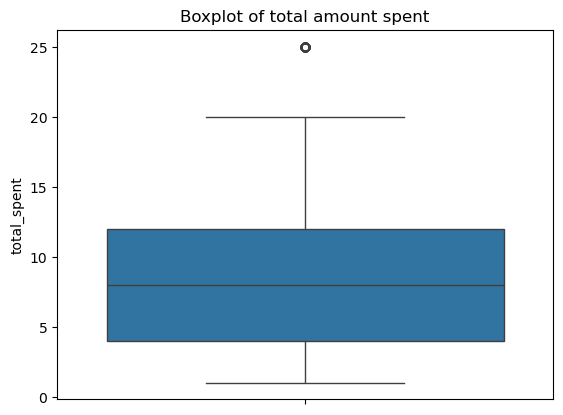

In [49]:
# lets utilize a boxplot to visualize this possible outlier
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df_clean['total_spent'])
plt.title('Boxplot of total amount spent')
plt.show

In [50]:
# The above plot confirms the assumption, lets remove any row where total amount spent is above 20
df_clean = df_clean[df_clean['total_spent'] <= 20.0]
df_clean

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
0,TXN_1961373,coffee,2.0,2.0,4.0,credit_card,takeaway,2023-09-08
1,TXN_4977031,cake,4.0,3.0,12.0,cash,in_store,2023-05-16
4,TXN_3160411,coffee,2.0,2.0,4.0,digital_wallet,in_store,2023-06-11
9,TXN_7619095,sandwich,2.0,4.0,8.0,cash,in_store,2023-05-03
10,TXN_2847255,salad,3.0,5.0,15.0,credit_card,in_store,2023-11-15
...,...,...,...,...,...,...,...,...
4542,TXN_9668108,cake,1.0,3.0,3.0,cash,in_store,2023-01-20
4544,TXN_9933628,smoothie,5.0,4.0,20.0,cash,in_store,2023-07-20
4546,TXN_2858441,sandwich,2.0,4.0,8.0,credit_card,in_store,2023-12-14
4547,TXN_3897619,sandwich,3.0,4.0,12.0,cash,takeaway,2023-02-24


In [51]:
# let's see how the outliers removal has affected our data
df_clean['total_spent'].describe()

count    2999.000000
mean        8.454652
std         5.432030
min         1.000000
25%         4.000000
50%         7.500000
75%        12.000000
max        20.000000
Name: total_spent, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

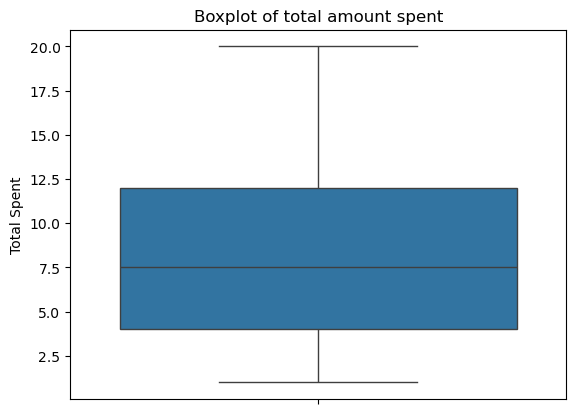

In [52]:
sns.boxplot(df_clean['total_spent'])
plt.title('Boxplot of total amount spent')
plt.ylabel('Total Spent')
plt.show

There was only a slight change in the average, possibly showing the outlier didn't have a significant affect on the data

## 5. Exploratory Visualizations

We created visualizations to better understand spending patterns and item distributions.
- Countplot/ bar charts for item categories
- Histograms of purchase amounts


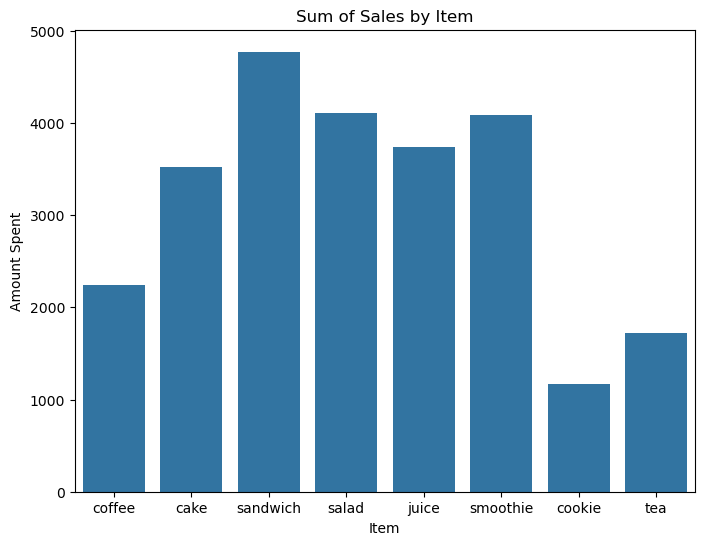

In [55]:
# Bar chart of total amount spent per item
plt.figure(figsize=(8, 6))
sns.barplot(x = 'item', y = 'total_spent', data = df_clean, estimator = sum, errorbar = None)
plt.title('Sum of Sales by Item')
plt.xlabel('Item')
plt.ylabel('Amount Spent')
plt.show()

Sandwiches perfomed the best in sales 

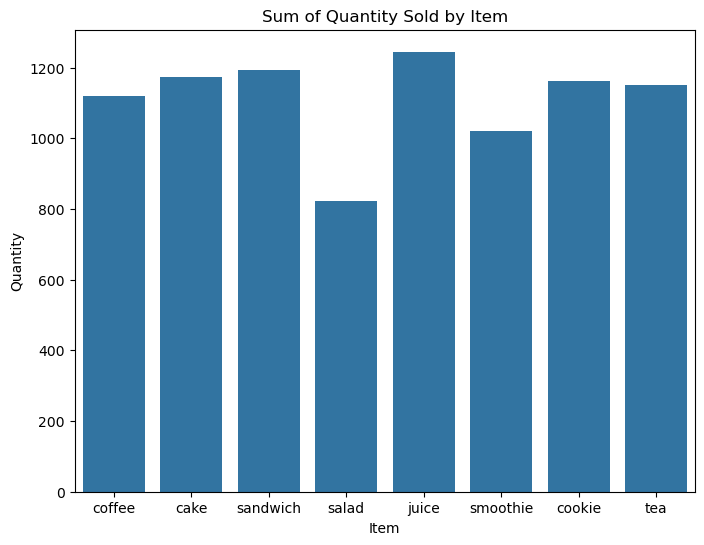

In [57]:
# Bar chart of quantity sold by item
plt.figure(figsize=(8, 6))
sns.barplot(x = 'item', y = 'quantity', data = df_clean, estimator = sum, errorbar = None)
plt.title('Sum of Quantity Sold by Item')
plt.xlabel('Item')
plt.ylabel('Quantity')
plt.show()

Juice was the most sold item

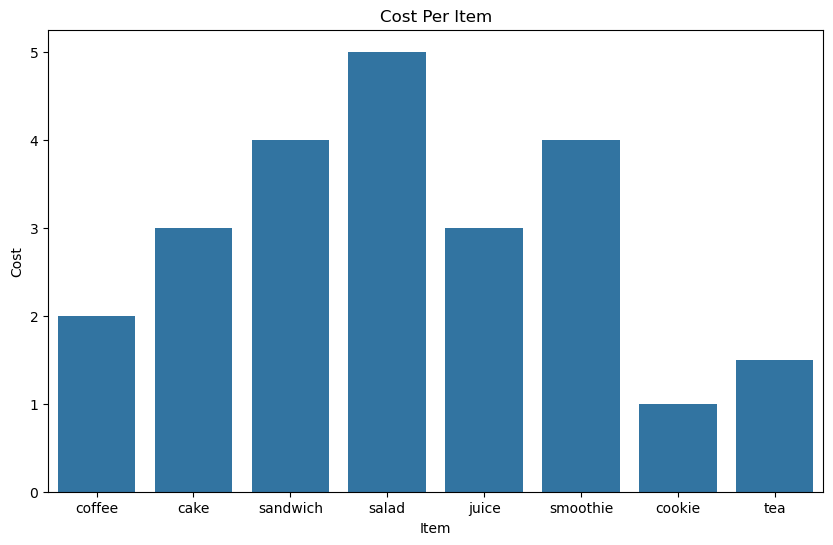

In [59]:
# Bar chart of Price per item
plt.figure(figsize=(10, 6))
sns.barplot(x = 'item', y = 'price_per_unit', data = df_clean)
plt.title('Cost Per Item')
plt.xlabel('Item')
plt.ylabel('Cost')
plt.show()

Salad is most expensive item.

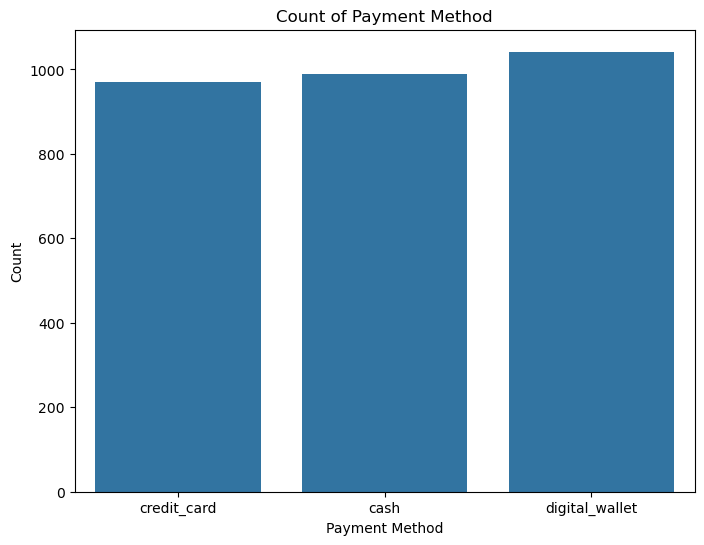

In [61]:
# Count of payment method
plt.figure(figsize=(8, 6)) 
sns.countplot(x = 'payment_method', data = df_clean)
plt.title('Count of Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

Disbursment is roughly evenly, although most customers lean towards purchasing with their digital wallet.

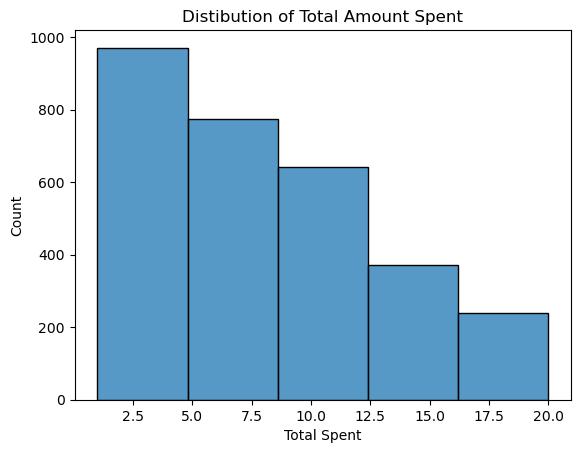

In [63]:
# Histogram of total amount spent
sns.histplot(data = df_clean, x = "total_spent", bins = 5)
plt.title('Distibution of Total Amount Spent')
plt.xlabel('Total Spent')
plt.ylabel('Count')
plt.show()


Histogram shows that the total amount spent is rightly skewed meaning that customers spend less per purchase in most cases.

## 6. Correlation Analysis

We focused on numerical variables: `quantity`, `price_per_unit`, and `total_spent`.

Findings:
- `total_spent` & `quantity`: 0.68 (moderate positive correlation)
- `total_spent` & `price_per_unit`: 0.62 (moderate positive correlation)
- Both statistically significant (p < 0.05)

These relationships suggest higher spending is associated with both buying more items and paying higher unit prices.


In [66]:
df_corr_filtered = df_clean[['quantity', 'price_per_unit', 'total_spent']] # isolating numerical columns to calculate correlation

df_corr_filtered.corr()

,quantity,price_per_unit,total_spent
quantity,1.000000,-0.068086,0.679548
price_per_unit,-0.068086,1.000000,0.615273
total_spent,0.679548,0.615273,1.000000


Nice, we found that total amount spent and quantity are moderately correlated with a value of 0.68.
Similarly, total amount spent and price_per_unit are moderately correlated with a value of 0.62.

Now we're are going to utilize p-values to determine if these correlation values are significant.
Using two sample T test, pearson correlation coefficiton, and scipy packages we'll determine the p values and compare that to a significance level of 0.05.

In [68]:
from scipy import stats

# total_spent vs. quantity
corr, p_value = stats.pearsonr(df_clean['total_spent'], df_clean['quantity']) # using pearson correlation

print('p_value:', p_value)

p_value: 0.0


In [69]:
# total_spent vs price_per_unit
t_statistic, p_value = stats.ttest_ind(df_clean['total_spent'], df_clean['price_per_unit']) # using T test

print('p_value:', p_value)

p_value: 0.0


## 7. Conclusions and Next Steps

**Key takeaways:**
- Dataset size: 10,000 rows × 8 columns.
- Cleaning reduced dataset size to 2999 x 8, but improved consistency.
- An outlier was present in total_spent column but did not drastically affect averages, changing from 8.94 to 8.45.
- Sandwiches produced the most in sales accruing almost 5000 dollars.
- juice was the most sold item with slightly over 1200 juices sold.
- Most customers use their digital wallet slightly more than cash or credit cards.
- Spending is moderately correlated with both quantity(r = 0.68) and unit price(r = 0.62).
- These insights could inform sales strategies and pricing decisions.

**What I'd do next:**
- Create features such as *hour of day*, *day of week*, or *item category* to analyze demand patterns.
- Investigate outliers more deeply.
- Build a simple forecasting or classification model.
- Package this EDA into a reproducible script and add tests for the cleaning functions.

This was some quick practice on handling unclean data, dealing with outliers, and basic exploratory data analysis

Please leave any suggestions on how I can improve my work. Thanks!